In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

# Creating sample Data

In [3]:
experience=[1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary=[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]
data=pd.DataFrame({"salary":salary,"experience":experience})
data.head()

,salary,experience
0,1.7,1.2
1,2.4,1.5
2,2.3,1.9
3,3.1,2.2
4,3.7,2.4


# Ploting the data

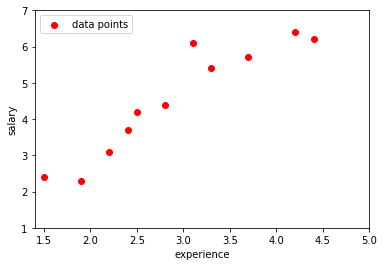

In [31]:
plt.scatter(data.experience,data.salary,color="red",label="data points")
plt.xlim(1.4,5)
plt.ylim(1,7)
plt.xlabel("experience")
plt.ylabel("salary")
plt.legend()

## Starting the line with small values of the parameter

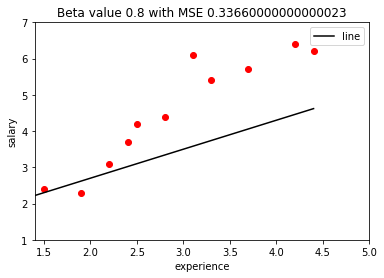

In [37]:
#making line for diffrent values of beta 0.1,0.8,1.5
beta=0.8
#keeping the intercept constant
b=1.1
# to store predicted points 
line1=[]
# generating prediction for every datapoint
for i in range(len(data)):
    line1.append(data.experience[i]*beta+b)
# Plotting the line
plt.scatter(data.experience,data.salary,color="red")
plt.plot(data.experience,line1,color="black",label="line")
plt.xlim(1.4,5)
plt.ylim(1,7)
plt.xlabel("experience")
plt.ylabel("salary")
plt.legend()
MSE=mse(data.experience,line1)
plt.title("Beta value "+str(beta)+" with MSE "+str(MSE))
MSE=mse(data.experience,line1)

## Computing the cost function over the range of beta

In [34]:
def error(beta,data):
    b=1.1
    
    salary=[]
    experience=data.experience
    for i in range(len(data.experience)):
        tmp=data.experience[i]*beta+b
        salary.append(tmp)
    MSE=mse(experience,salary)
    return MSE

In [35]:
#slope in range of 0 to 1.5 with increment of 0.01
slope=[i/100 for i in range(0,150)]
Cost=[]
for i in slope:
    cost=error(beta=i,data=data)
    Cost.append(cost)

In [38]:
cost_table=pd.DataFrame({"Beta":slope,"Cost":Cost})
cost_table

,Beta,Cost
0,0.00,3.721667
1,0.01,3.611426
2,0.02,3.502906
3,0.03,3.396105
4,0.04,3.291024
...,...,...
145,1.45,5.690162
146,1.46,5.829274
147,1.47,5.970105
148,1.48,6.112656


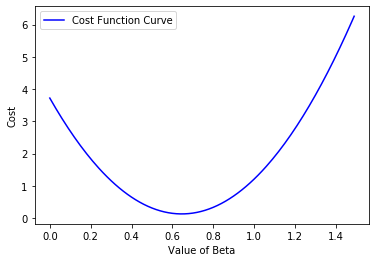

In [43]:
plt.plot(cost_table.Beta,cost_table.Cost,color="blue",label="Cost Function Curve")
plt.xlabel("Value of Beta")
plt.ylabel("Cost")
plt.legend()